In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import subprocess
# import seaborn as sns

# from astrometry.libkd.spherematch import match_radec
from fits import tractor_cat
import psql
import targets
import pickle
# import plots

In [1]:
from reproject import reproject_from_healpix, reproject_to_healpix
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt

In [12]:
class Dog(object):
    def __init__(self):
        self.a=10

a=Dog()
a.image=np.arange(10)
# a.a
'image' in a.__dict__

True

In [23]:
def func(rand=rand):
    return rand.uniform(0,1,5)

for i in range(5):
    rand = np.random.RandomState(None)
    print func(rand=rand)

[ 0.34170927  0.74162092  0.29121498  0.979549    0.38286504]
[ 0.85035569  0.49165923  0.5605364   0.80794297  0.98581102]
[ 0.85723353  0.73304541  0.3103215   0.42436774  0.27885466]
[ 0.55540745  0.79875635  0.31159231  0.04907888  0.70186449]
[ 0.03564964  0.06098774  0.15478905  0.87047615  0.6699793 ]


In [27]:
from astropy.io import fits

In [69]:
500/32400.

0.015432098765432098

In [59]:
rand = np.random.RandomState(1)
rand.random_integers(0,2**18, 5)


/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 262144 + 1) instead
  from ipykernel import kernelapp as app


array([128037,  73349, 117583,  21440, 229520])

In [44]:
def bin_up(data_bin_by,data_percentile,bL=20., bH=26.,bW=0.25):
    '''finds indices for 0.25 bins, returns bin centers and q25,50,75 percentiles of data_percentile in each bin
    bL,bH -- min and max values of data_bin to consider
    bW -- bin width'''
    bL,bH=data_bin_by.min(),data_bin_by.max()
    bW=(bH-bL)/10.
    low_vals= np.arange(bL,bH,bW)
    q25= np.zeros(low_vals.size)+np.nan
    q50,q75= q25.copy(),q25.copy()
    for i,low in enumerate(low_vals):
        ind= np.all((low <= data_bin_by,data_bin_by < low+bW),axis=0)
        print "i=",i,"ind=",ind
        if np.where(ind)[0].size > 0:
            q25[i]= np.percentile(data_percentile[ind],q=25)
            q50[i]= np.percentile(data_percentile[ind],q=50)
            q75[i]= np.percentile(data_percentile[ind],q=75)
        else:
            pass #given qs nan, which they already have
    return low_vals+bW/2,q25,q50,q75


In [45]:
a=fits.open('simcat-1931p197-star-00.fits')
data=a[1].data
ra=data['ra']
flux={}
for band in ['g','r','z']:
    flux[band+'flux']=data[band+'flux']
    flux[band+'c'],flux[band+'q25'],flux[band+'q50'],flux[band+'q75']=bin_up(ra,flux[band+'flux'])
    


i= 0 ind= [ True  True False False  True False False False False False False False
 False False  True False  True  True False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True]
i= 1 ind= [False False False False False False False False False False False False
 False False False  True False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False]
i= 2 ind= [False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False  True False  True False False False  True False False
 False False False False False False False False False False False False
 False False]
i= 3 ind= [False False False  True False False False

In [46]:
flux['gq25']

array([ 0.20234102,  2.66215947,  0.16339016,  0.0869827 ,  0.45409424,
        0.21760638,  0.24572036,  0.54443749,  0.05693437,  0.0320858 ])

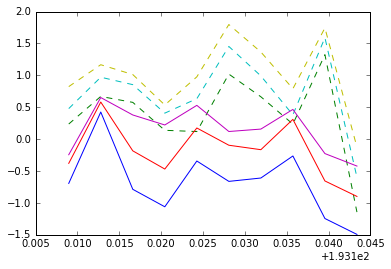

In [47]:
for band in ['g','r','z']:
    plt.plot(flux[band+'c'],np.log10(flux[band+'q25']),ls='-')
    plt.plot(flux[band+'c'],np.log10(flux[band+'q75']),ls='--')

(array([ 4.,  5.,  7.,  6.,  3.,  5.,  7.,  4.,  4.,  5.]),
 array([-1.94455845, -1.59972885, -1.25489925, -0.91006965, -0.56524005,
        -0.22041045,  0.12441915,  0.46924875,  0.81407835,  1.15890795,
         1.50373754]),
 <a list of 10 Patch objects>)

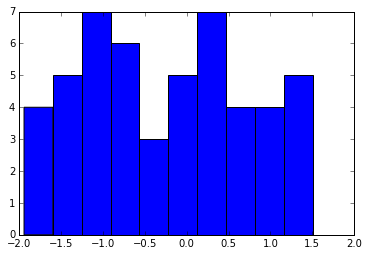

In [35]:
plt.hist(np.log10(flux['gflux']))

In [37]:
ra.max(),ra.min()

(193.14530723838891, 193.1070498916969)

In [4]:

filename_ligo = get_pkg_data_filename('allsky/ligo_simulated.fits.gz')
hdu_ligo = fits.open(filename_ligo)[1]
target_header = fits.Header.fromstring("""
NAXIS   =                    2
NAXIS1  =                 1000
NAXIS2  =                  800
CTYPE1  = 'RA---MOL'
CRPIX1  =                  500
CRVAL1  =                180.0
CDELT1  =                 -0.4
CUNIT1  = 'deg     '
CTYPE2  = 'DEC--MOL'
CRPIX2  =                  400
CRVAL2  =                  0.0
CDELT2  =                  0.4
CUNIT2  = 'deg     '
COORDSYS= 'icrs    '
""", sep='\n')
array, footprint = reproject_from_healpix(filename_ligo, target_header)

ImportError: No module named healpy

In [3]:
ax = plt.subplot(1,1,1, projection=WCS(target_header))
ax.imshow(array, vmin=0, vmax=1.e-8)
ax.coords.grid(color='white')
ax.coords.frame.set_color('none')

NameError: name 'array' is not defined

In [4]:
def deg2rad(deg):
    return deg*np.pi/180

def radec_sep(ra_ref,dec_ref,ra2,dec2,radius):
    '''find the index of ra2,dec2 that is smallest distance from reference ra,dec and
    if distance <= radius, return index of that ra2,dec2; else return None
    ra_ref,dec_ref [radians]-- reference point
    ra2,dec2 [radians] -- arrays that will compute separation for between the reference point
    radius [degrees]'''
    dist= radius*180/np.pi*np.sqrt( np.cos(dec_ref)**2 *np.power(ra2-ra_ref,2) + \
                                   np.power(dec2-dec_ref,2) )
    i_smallest= np.argsort(dist)[0]
    if dist[i_smallest] <= radius: return i_smallest
    else: return -1



In [7]:
decam=tractor_cat('tractor_decam.fits')
bokmos=tractor_cat('tractor_bokmos.fits')
fout=open('decam_matched_with_bokmos.pickle','r')
i_corr= pickle.load(fout)
fout.close()

In [113]:
ra1,dec1= deg2rad(decam['ra']),deg2rad(decam['dec'])
ra2,dec2= deg2rad(bokmos['ra']),deg2rad(bokmos['dec'])
i_test= [radec_sep(ra_ref,dec_ref,ra2,dec2, 1./3600) for ra_ref,dec_ref in zip(ra1,dec1)]
i_test=np.array(i_test)

In [109]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [103]:


# Assign central coordinates uniformly but remove simulated sources which
# are too near to one another.  Iterate until we have the requisite number
# of objects.
seed=2
nobj=10
bounds = [150,155,5,8] #brickwcs.radec_bounds()
rand = np.random.RandomState(seed)
ra= np.zeros(nobj)+np.nan
dec=ra.copy()
ra[0],dec[0]= rand.uniform(bounds[0],bounds[1]), rand.uniform(bounds[2],bounds[3])
for cnt in range(1,nobj):
    new_ra= rand.uniform(bounds[0],bounds[1])
    new_dec = rand.uniform(bounds[2],bounds[3])
    dist= np.sqrt(ra)


In [136]:
ra[i_bad]= rand.uniform(bounds[0],bounds[1],ra[i_bad].shape[0])
dec[i_bad]= rand.uniform(bounds[2],bounds[3],dec[i_bad].shape[0])
tree = KDTree(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()])) #data has shape NxK, N points and K dimensions (K=2 for ra,dec) 
ds, i_tree = tree.query(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()]), k=2)
ra[ ds[:,1] < 300*1./3600 ].shape

(12,)

In [140]:
ra[ds[:,1] < 1./3600].shape[0]

0

In [145]:
for i in range(5): print rand.uniform(bounds[0],bounds[1],5)

[ 154.76551303  152.30183877  152.48381106  150.65223345  154.92632379]
[ 151.84871441  154.47861993  153.12647584  155.32649861  152.02886131]
[ 153.3291029   152.89052888  153.08238105  153.33633067  151.22133754]
[ 154.03594391  154.7029545   151.54575886  154.12643306  154.77832948]
[ 153.49165526  152.36991662  152.10272065  155.15804176  150.22275404]


In [148]:
bounds = [150,150.25,5,5.25]
ra= rand.uniform(bounds[0],bounds[1],500)
dec= rand.uniform(bounds[2],bounds[3],500)
tree = KDTree(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()])) #data has shape NxK, N points and K dimensions (K=2 for ra,dec) 
ds, i_tree = tree.query(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()]), k=2)
i_bad= ds[:,1] < 5./3600
cnt=0
while ra[i_bad].shape[0] > 0:
    tree = KDTree(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()])) #data has shape NxK, N points and K dimensions (K=2 for ra,dec) 
    ds, i_tree = tree.query(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()]), k=2) #id for each data.query source that is NN of each input source
    ra[i_bad]= rand.uniform(bounds[0],bounds[1],ra[i_bad].shape[0])
    dec[i_bad]= rand.uniform(bounds[2],bounds[3],dec[i_bad].shape[0])
    i_bad= ds[:,1] < 5./3600
    print "cnt=%d, ra[i_bad].shape=" % cnt,ra[i_bad].shape
    cnt+=1
    if cnt > 10: break
    #make sense of results
# i_ref,i_other={},{}
# i_ref['match']= np.arange(len(ref_ra))[ds<=dsmax]
# i_ref['nomatch']= np.arange(len(ref_ra))[ds>dsmax]
# i_other['match']= i_tree[ds<=dsmax]
# i_other['nomatch']= i_tree[ds>dsmax]
# assert(len(ref_ra[i_ref['match']]) == len(ra[i_other['match']]))
# if verb: print "%d/%d Refs matched, %d/%d Refs unmatched" % \
#                 (i_ref['match'].size,len(ref_ra),i_ref['nomatch'].size,len(ref_ra))
# return i_ref,i_other
#tree = KDTree(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()]))
#ds, i_tree = tree.query(np.transpose([ref_dec.copy(),np.cos(ref_dec.copy()*np.pi/180)*ref_ra.copy()]), k=1)

cnt=0, ra[i_bad].shape= (18,)
cnt=1, ra[i_bad].shape= (2,)
cnt=2, ra[i_bad].shape= (2,)
cnt=3, ra[i_bad].shape= (2,)
cnt=4, ra[i_bad].shape= (0,)


In [111]:
i_ref

{'match': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 'nomatch': array([], dtype=int64)}

In [112]:
#match distances where x= Dec, y= cos(Dec)*Ra
def match_radec_exact(ref_ra,ref_dec, ra,dec, k=1, dsmax=1./3600,verb=True):
    '''computes distance (deg separation)= sqrt{(dec1-dec2)^2+ cos[0.5*(dec1+dec2)]^2*(ra1-ra2)^2}
    return two dicts:
    1)indices of reference data where matched and unmatched
    2)indices of comparison data where matched, unmatched
    UNITS: degrees for all
    '''
    assert(len(ref_ra) == len(ref_dec))
    assert(len(ra) == len(dec))
    #index tree
    tree = KDTree(np.transpose([dec.copy(),np.cos(dec.copy()*np.pi/180)*ra.copy()])) #data has shape NxK, N points and K dimensions (K=2 for ra,dec) 
    #look in tree for each references point, return k=1 NN
    ds, i_tree = tree.query(np.transpose([ref_dec.copy(),np.cos(ref_dec.copy()*np.pi/180)*ref_ra.copy()]), k=k) #id for each data.query source that is NN of each input source
    #make sense of results
    i_ref,i_other={},{}
    i_ref['match']= np.arange(len(ref_ra))[ds<=dsmax]
    i_ref['nomatch']= np.arange(len(ref_ra))[ds>dsmax]
    i_other['match']= i_tree[ds<=dsmax]
    i_other['nomatch']= i_tree[ds>dsmax]
    assert(len(ref_ra[i_ref['match']]) == len(ra[i_other['match']]))
    if verb: print "%d/%d Refs matched, %d/%d Refs unmatched" % \
                    (i_ref['match'].size,len(ref_ra),i_ref['nomatch'].size,len(ref_ra))
    return i_ref,i_other

In [60]:
i_decam,i_bokmos= match_radec(decam['ra'],decam['dec'], bokmos['ra'],bokmos['dec'], dsmax=1./3600)

240/5770 Refs matcheed, 5530/5770 Refs unmatched


In [54]:
i_decam,i_bokmos= match_radec(decam['ra'],decam['dec'], bokmos['ra'],bokmos['dec'], dsmax=1./3600)

240/5770 Refs matcheed, 5530/5770 Refs unmatched


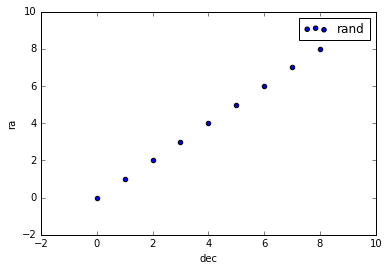

In [167]:
plt.scatter(range(10),range(10),c='b',label='rand')
plt.legend(loc=0)
xlab=plt.xlabel('ra')
ylab=plt.ylabel('dec')
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

# plt.scatter?

In [11]:
from scipy.spatial import KDTree
decamT = KDTree(np.transpose([decam['ra'],decam['dec']]))
bokmosT = KDTree(np.transpose([bokmos['ra'],bokmos['dec']]))

# decam is ref, finding nearest bokmos
ds, ids = decamT.query(bokmosT.data, k=1) #id for each decam source that is NN of each bokmos source

dsmax = 1/3600.

sel = (ds<dsmax)
print len(bokmos['ra'][sel]) # 116,791 withins 1 arcsec.
print len(decam['ra'][ids[sel]])
print len(bokmos['ra'][i_corr])

241
241


IndexError: index 278 is out of bounds for axis 1 with size 265

In [109]:
l

array([ True,  True, False,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,

In [86]:
d=np.arange(5,10)
# np.where(d == d[d < 8].min())
print np.argsort(d)
print d

[0 1 2 3 4]
[5 6 7 8 9]


In [71]:
import pickle
a='hello'
fout=open('test.txt','w')
pickle.dump(a,fout)
fout.close()

In [73]:
pwd

u'/Users/kaylan/research/desi/thesis_code'

# fake galaxies

In [2]:
from scipy.ndimage import imread

(array([  3.66484700e+06,   5.75934200e+06,   2.98842900e+06,
          4.19755000e+05,   6.01660000e+04,   3.11850000e+04,
          2.14330000e+04,   1.01770000e+04,   3.55800000e+03,
          1.10800000e+03]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

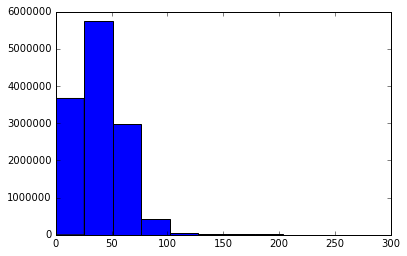

In [59]:
import matplotlib.patches as patches
# p = patches.Rectangle((bbox.x1, bbox.y1), xwidth, ywidth,
#                               fc = 'none', ec = 'red')
#         ax.add_patch(p)

In [60]:
patches.Rectangle?

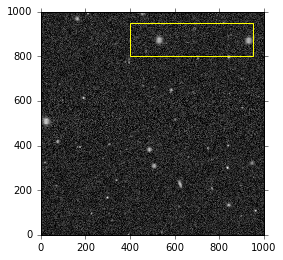

In [67]:
kwargs=dict(origin='lower',interpolation='nearest',cmap='gray')

xrng=[400,950]
yrng=[800,950]

img=imread('../test.png')[1000:2000,1000:2000,0]
fig,ax=plt.subplots() #,sharey=True,sharex=True)
# plt.subplots_adjust(wspace=0.25) #,hspace=0.2)
# ax[i].imshow(np.zeros((1000,1000))+500.,extent=(2000,3000,2000,3000),**kwargs)
ax.tick_params(direction='out')
ax.set_xlim(0,img.shape[0])
ax.set_ylim(0,img.shape[1])
ax.imshow(img,**kwargs)
p= patches.Rectangle((xrng[0],yrng[0]), xrng[1]-xrng[0], yrng[1]-yrng[0],
                              fc = 'none', ec = 'yellow')
ax.add_patch(p)
# ax.imshow(img,extent=[0,200,0,200],**kwargs)

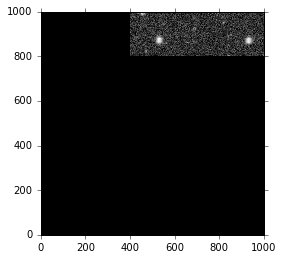

In [58]:
kwargs=dict(origin='lower',interpolation='nearest',cmap='gray')

img=imread('../test.png')[1000:2000,1000:2000,0]
fig,ax=plt.subplots() #,sharey=True,sharex=True)
# plt.subplots_adjust(wspace=0.25) #,hspace=0.2)
# ax[i].imshow(np.zeros((1000,1000))+500.,extent=(2000,3000,2000,3000),**kwargs)
ax.tick_params(direction='out')
ax.set_xlim(0,img.shape[0])
ax.set_ylim(0,img.shape[1])
xrng=[400,1000]
yrng=[800,1000]
new_img=np.zeros(img.shape)
new_img[yrng[0]:yrng[1],xrng[0]:xrng[1]]= img[yrng[0]:yrng[1],xrng[0]:xrng[1]]
ax.imshow(new_img,**kwargs)
# ax.imshow(img,extent=[0,700,0,700],**kwargs)

# xy=img[:,:,0].shape
# ax[i].set_xlim(xy[0],xy[1])
# ax[i].set_ylim(xy[0],xy[1])

/Users/kaylan/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3600, right=3600
  'left=%s, right=%s') % (left, right))
/Users/kaylan/miniconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3045: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=3600, top=3600
  'bottom=%s, top=%s') % (bottom, top))


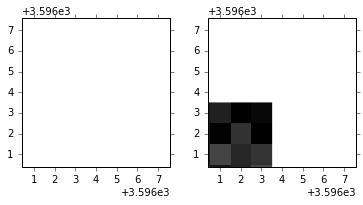

In [25]:
kwargs=dict(origin='lower',interpolation='nearest',cmap='gray')

img=imread('../test.png')
fig,ax=plt.subplots(1,2) #,sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.25) #,hspace=0.2)
for i in range(2):
    vis=True
    if i == 0: vis=False
    ax[i].imshow(img[:,:,0],visible=vis,**kwargs)
    ax[i].imshow(np.zeros((1000,1000))+500.,extent=(2000,3000,2000,3000),**kwargs)
    ax[i].tick_params(direction='out')
    xy=img[:,:,0].shape
    ax[i].set_xlim(xy[0],xy[1])
    ax[i].set_ylim(xy[0],xy[1])

In [31]:
h.shape

(803, 512, 4)

In [32]:
import matplotlib.cbook as cbook

datafile = cbook.get_sample_data('ada.png')
h = imread(datafile)[:,:,0]
dpi = 100
figsize = h.shape[0]/dpi, h.shape[1]/dpi

figure(figsize=figsize)
ax = axes([0,0,1,1], frameon=False)
ax.set_axis_off()
ax.set_xlim(0,2)
ax.set_ylim(0,2)
im = imshow(h, origin='upper',extent=[-2,4,-2,4])  # axes zoom in on portion of image
im2 = imshow(h, origin='upper',extent=[0,.5,0,.5]) # image is a small inset on axes

NameError: name 'figure' is not defined

In [21]:
plt.imshow?

 # PTF timing on BB

In [88]:
def hms2s(hms_list):
        new_list=[]
        for hms in hms_list:
            temp=np.array(hms.split(':')).astype(int)
            new_list.append( temp[0]*3600+temp[1]*60+temp[2] )
        return np.array(new_list).astype(int)    

class Timing(object):
    def __init__(self,fn):
        self.cores,self.wh,self.nptf=np.loadtxt(fn,dtype=int,usecols=(1,2,3),unpack=True)
        self.disk=np.loadtxt(fn,dtype=str,usecols=(0,),unpack=True)
        start,end=np.loadtxt(fn,dtype=str,usecols=(4,5),unpack=True)
        start,end= hms2s(start),hms2s(end)
        self.runtime= end-start
    def scaling(self,x1,y1,xvals):
        '''y \propto 1/x'''
        x2,y2= 2.*x1,y1/2.
        coeff= (y2-y1)/(1./x2-1./x1)
        inter= y1-coeff/x1
        return coeff/xvals +inter
    





In [15]:
[x for x in dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'b']

In [26]:
c.a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
class Hello(object):
    def __init__(self):
        self.a=np.arange(10)
        self.b=np.arange(10)
    def _ats(self):
        at_list= []
        for i in dir(self):
            print 'i=',i,'type(i)=',type(i)
            if i.startswith('_') == False: at_list.append(i)
        return at_list
c=Hello()
c._ats()

i= __class__ type(i)= <type 'str'>
i= __delattr__ type(i)= <type 'str'>
i= __dict__ type(i)= <type 'str'>
i= __doc__ type(i)= <type 'str'>
i= __format__ type(i)= <type 'str'>
i= __getattribute__ type(i)= <type 'str'>
i= __hash__ type(i)= <type 'str'>
i= __init__ type(i)= <type 'str'>
i= __module__ type(i)= <type 'str'>
i= __new__ type(i)= <type 'str'>
i= __reduce__ type(i)= <type 'str'>
i= __reduce_ex__ type(i)= <type 'str'>
i= __repr__ type(i)= <type 'str'>
i= __setattr__ type(i)= <type 'str'>
i= __sizeof__ type(i)= <type 'str'>
i= __str__ type(i)= <type 'str'>
i= __subclasshook__ type(i)= <type 'str'>
i= __weakref__ type(i)= <type 'str'>
i= _ats type(i)= <type 'str'>
i= a type(i)= <type 'str'>
i= b type(i)= <type 'str'>


['a', 'b']

4


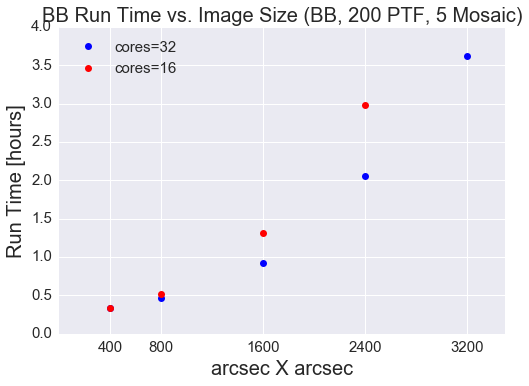

In [104]:
#varyWH
i_32= np.all((tim.disk == 'BB',tim.cores == 32,tim.nptf == 200),axis=0)
i_16= np.all((tim.disk == 'BB',tim.cores == 16,tim.nptf == 200),axis=0)
print tim.disk[i_16].shape[0]
assert(np.all((tim.disk[i_32].shape[0] == 5,tim.disk[i_16].shape[0] == 4),axis=0))
lab_args=dict(fontsize=20)
leg_args=dict(fontsize=15)
tick_args=dict(labelsize=15)
fig,ax=plt.subplots()
ax.plot(tim.wh[i_32],tim.runtime[i_32]/3600.,'bo',label='cores=32')
ax.plot(tim.wh[i_16],tim.runtime[i_16]/3600.,'ro',label='cores=16')
ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.set_xticks(tim.wh[i_32])
#xvals=np.linspace(1,70)
#x1,y1=bb.cores[0],bb.runtime[0]/3600.
#ax.plot(xvals,bb.scaling(x1,y1,xvals),'k--',label=r'BB Time $\propto$ 1/Cores')
ax.set_title("BB Run Time vs. Image Size (200 PTF, 5 Mosaic)",**lab_args)
ax.set_xlabel('arcsec X arcsec',**lab_args)
ax.set_ylabel('Run Time [hours]',**lab_args)
ax.legend(loc=0,**leg_args)
ax.tick_params(axis='both', which='major', **tick_args)
# plt.savefig('tractor_timing.png',dpi=100)

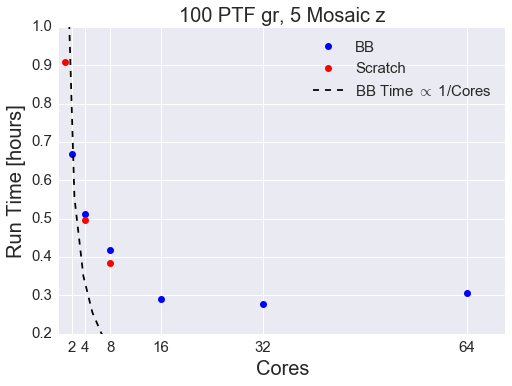

In [80]:
bb=Timing('timing_bb.txt')
scr=Timing('timing_scratch.txt')
#
lab_args=dict(fontsize=20)
leg_args=dict(fontsize=15)
tick_args=dict(labelsize=15)
fig,ax=plt.subplots()
ax.plot(bb.cores,bb.runtime/3600.,'bo',label='BB')
ax.plot(scr.cores,scr.runtime/3600.,'ro',label='Scratch')
ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())
ax.set_xticks(x)
xvals=np.linspace(1,70)
x1,y1=bb.cores[0],bb.runtime[0]/3600.
ax.plot(xvals,bb.scaling(x1,y1,xvals),'k--',label=r'BB Time $\propto$ 1/Cores')
ax.set_title("100 PTF gr, 5 Mosaic z",**lab_args)
ax.set_xlabel('Cores',**lab_args)
ax.set_ylabel('Run Time [hours]',**lab_args)
ax.legend(loc=0,**leg_args)
ax.tick_params(axis='both', which='major', **tick_args)
plt.savefig('tractor_timing.png',dpi=100)

 # Fake Image unit test

In [3]:
cat=tractor_cat('../tractor_cat_ptf/100g100R/tractor-custom-150385p02200.fits')

In [10]:
cat['ra'].min(),cat['ra'].max(),np.around?

In [ ]:
cat['ra'].min(),cat['ra'].max(),np.around

In [19]:
pwd

u'/Users/kburleigh/PhdStudent/Research/peter/thesis_code'

In [24]:
def deg_to_arcsec(deg):
    return deg*3600.
pixscale=1.
npix_ra= deg_to_arcsec(cat['ra'].max()-cat['ra'].min())/pixscale
npix_ra= int(npix_ra+1)
npix_dec= deg_to_arcsec(cat['dec'].max()-cat['dec'].min())/pixscale
npix_dec= int(npix_dec+1)
img= np.zeros((npix_ra,npix_dec))


(504, 502)

In [28]:
def sersic(r,I0=10.,re=10,n=4,vn=7.66925):
    return I0*np.exp(-vn*(r/re)**(1./n))

def dev(r):
    return sersic(r)



array([ 0.5  ,  0.525,  0.55 ,  0.575,  0.6  ])

In [6]:
from PIL import Image

In [7]:
Image.open?

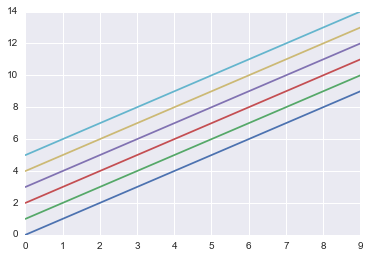

In [5]:
sns.color_palette('dark')
for i in range(6): plt.plot(np.arange(10)+i)

In [17]:
cat['shapeexp_r'][0],cat['shapeexp_e1'][0],cat['shapeexp_e2'][0],cat['fracdev'][0]

(0.0, 0.0, 0.0, 0.0)

In [48]:
class Grid(object):
    def __init__(self,ramin,ramax,decmin,decmax,pixscale):
        self.npix_ra= int(deg_to_arcsec(ramax-ramin)/pixscale + 1)
        self.npix_dec= int(deg_to_arcsec(decmax-decmin)/pixscale + 1)
        self.ra_centers= np.linspace(ramin,ramax,num=self.npix_ra)
        self.dec_centers= np.linspace(decmin,decmax,num=self.npix_dec)
        self.img= np.zeros((self.npix_ra,self.npix_dec))
    def nearest_pix(self,ra,dec):
        '''return x,y index for img of nearest ra,dec pixel center to ra,dec'''
        return np.argsort(np.abs(self.ra_centers-ra))[0], np.argsort(np.abs(self.dec_centers-dec))[0]
    def fill_img(self,ra,dec):
        i,j= self.nearest_pix(ra,dec)
        self.img[i,j]+= 1
# def unit_test():
# grid= Grid(0.5,0.6,0.,0.1,50.)
# i,j= grid.nearest_pix(0.58,0.091)
# print grid.ra_centers, grid.ra_centers[i]
# print grid.dec_centers, grid.dec_centers[j]

In [49]:
pixscale=1.
grid= Grid(cat['ra'].min(),cat['ra'].max(),cat['dec'].min(),cat['dec'].max(),pixscale)
for ra,dec in zip(cat['ra'],cat['dec']): grid.fill_img(ra,dec)


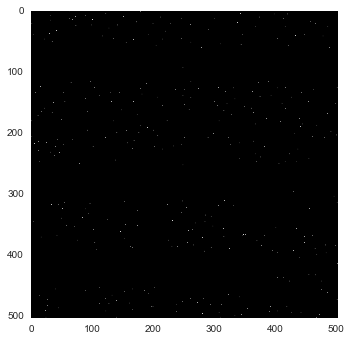

In [53]:
plt.imshow(grid.img,cmap='gray')
plt.grid(False)
# plt.imshow?

In [3]:
import numpy as np
import os
a=np.arange(10)
b=np.arange(10)
print a < 5
print b > 3
print np.logical_and(a < 5,b>3)
a='../8.png'
os.path.dirname(a),os.path.basename(a)

[ True  True  True  True  True False False False False False]
[False False False False  True  True  True  True  True  True]
[False False False False  True False False False False False]


('..', '8.png')

In [72]:
a.keys()

AttributeError: 'float' object has no attribute 'keys'

 # python match_radec

In [201]:
from fits import tractor_cat


In [219]:
a=tractor_cat('data/deep2f3/tractor-custom-352000p00000.fits')
a['decam_flux'].shape

(6358, 6)

In [215]:
tractor_keys=['decam_flux','decam_flux_ivar','decam_mw_transmission','wise_flux',\
              'wise_flux_ivar','wise_mw_transmission']
db_keys=['gflux','gflux_ivar','g_ext','w1flux','w1flux_ivar','w1_ext']
same_keys=['ra','dec','type']

In [222]:
data={}
for k in same_keys:
    data[k]= a[k]
data['type']= np.char.strip(data['type'])
for band,ind in zip(['g','r','z'],[1,2,4]):
    data[band+'flux']= a['decam_flux'][:,ind]
    data[band+'flux_ivar']= a['decam_flux_ivar'][:,ind]
    data[band+'_ext']= a['decam_mw_transmission'][:,ind]
for band,ind in zip(['w1'],[0]):
    data[band+'flux']= a['wise_flux'][:,ind]
    data[band+'flux_ivar']= a['wise_flux_ivar'][:,ind]
    data[band+'_ext']= a['wise_mw_transmission'][:,ind]

In [227]:
reload(targets)

decam=targets.read_from_tractor_cat('data/deep2f3/tractor-custom-352000p00000.fits')


# matched Decam to Bok+Mos in D2F3

In [9]:
from psql import load_ofile

In [68]:
np.any(([True,False,True],[False,False,True]),axis=0)

array([ True, False,  True], dtype=bool)

In [2]:
reload(psql)
reload(targets)
#decam with matched bokmos (1 match)
m1={}
fn='data/deep2f3/decam_with_matching_bokmos.txt'
decam= psql.load_ofile(fn,range(15))
bokmos= psql.load_ofile(fn,range(15,30))
m1['decam']= targets.DECaLS(decam, w1=True)
m1['bokmos']= targets.DECaLS(bokmos, w1=True)
for key in ['ra','dec']: assert( (m1['decam'].data[key] - m1['bokmos'].data[key]).max() < 1e-3)
#bokmos with matched decam (1 match)
fn='data/deep2f3/bokmos_with_matching_decam.txt'
decam= psql.load_ofile(fn,range(15))
bokmos= psql.load_ofile(fn,range(15,30))
m2={}
m2['decam']= targets.DECaLS(decam, w1=True)
m2['bokmos']= targets.DECaLS(bokmos, w1=True)
for key in ['ra','dec']: assert( (m2['decam'].data[key] - m2['bokmos'].data[key]).max() < 1e-3)
#unmatched
unm={}
fn='data/deep2f3/decam_wout_match_in_bokmos.txt'
decam= psql.load_ofile(fn,range(15))
fn='data/deep2f3/bokmos_wout_match_in_decam.txt'
bokmos= psql.load_ofile(fn,range(15))
unm['decam']= targets.DECaLS(decam, w1=True)
unm['bokmos']= targets.DECaLS(bokmos, w1=True)

DECaLS object initialized
DECaLS object initialized
DECaLS object initialized
DECaLS object initialized
DECaLS object initialized
DECaLS object initialized


(array(0.0), array(1.0), array(0.0), array(0.0))

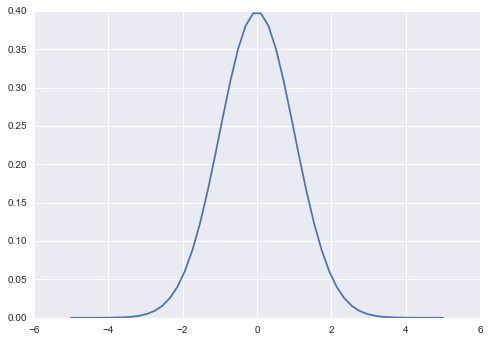

In [108]:
G=stats.norm(0,1)
x=np.linspace(-5,5,num=50)
plt.plot(x,G.pdf(x))
G.stats(moments='mvsk')

In [111]:
a=(m1['decam'].data['gflux']-m1['bokmos'].data['gflux'])/np.sqrt(\
        np.power(m1['decam'].data['gflux_ivar'],-1)+np.power(m1['bokmos'].data['gflux_ivar'],-1))


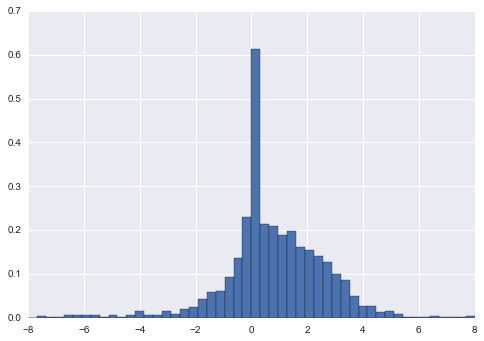

In [61]:
pdf,bins,junk=plt.hist(a,range=(-8,8),bins=50,normed=True)

In [106]:
unit_gauss.cdf(3)-unit_gauss.cdf(-3), 2*unit_gauss.cdf(-3,loc=0,scale=1)

TypeError: cdf() got an unexpected keyword argument 'loc'

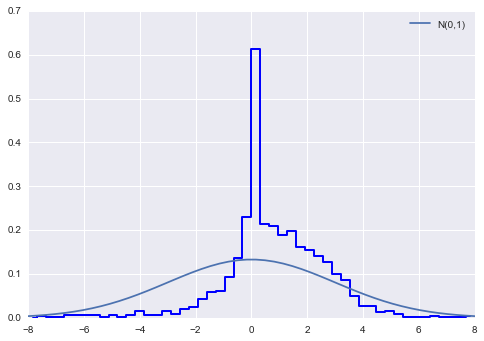

In [62]:
binw= (bins[1:]-bins[:-1])/2
binc= bins[:-1]+binw
plt.step(binc,pdf, where='mid',c='b',lw=2)
from scipy import stats

unit_gauss= stats.norm(0,1^2)
x=np.linspace(-8,8)
plt.plot(x,unit_gauss.pdf(x),label="N(0,1)")
plt.legend(loc=1)

In [109]:
unit_gauss.stats(moments='mvsk')
1^2

3

{'gauss': {'frac_out': 0.0026997960632601866,
  'mean': 0.0078758866276756323,
  'q25': -0.66168383783101947,
  'std': 0.99786598885789135},
 'sample': {'frac_out': 0.12256388046773495,
  'mean': -0.017224926877273925,
  'q25': -0.012913905665299862,
  'q75': 1.893817415697701,
  'std': 18.143612211517173}}

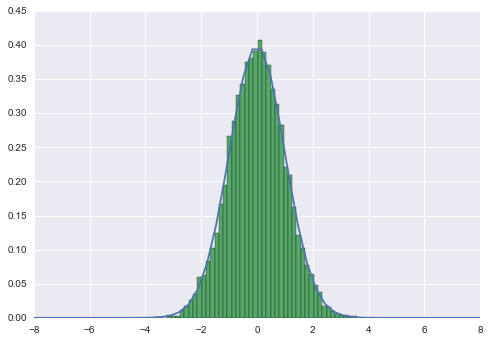

In [123]:
def n_gt_3_sigma(sample, low=-8.,hi=8.):
    '''for a sample that should be distributed as N(mean=0,stddev=1), returns mask for the N that are greater 3 sigma
    low,hi -- minimum and maximum sample values that will be considered'''
    i_left= np.all((sample >= low,sample <= -3.),axis=0)
    i_right= np.all((sample <= hi,sample>=3),axis=0)
    #assert i_left and i_right are mutually exclusive
    false_arr= np.all((i_left,i_right),axis=0) #should be array of Falses
    assert( np.all(false_arr == False) ) #should be np.all([True,True,...]) which evaluates to True
    return np.any((i_left,i_right),axis=0)

def gauss_stats(d, n_samples=10000):
    '''puts stats about a unit gaussian N(0,1) in a dictionary "d"
    n_samples number of draws will compute stats for, set this to sample size...
    mean,stddev,q25,frac outliers above 3 sigma'''
    G= stats.norm(0,1)
    xvals=np.linspace(-8,8)
    plt.plot(xvals,G.pdf(xvals))
    draws= G.rvs(n_samples) #random draws
    plt.hist(draws,bins=50,normed=True)
    tol=1e-2
    assert(np.mean(draws)<=tol)
    assert(np.std(draws)-1. <=tol)
    d['mean'],d['std'],d['q25'],d['frac_out']= np.mean(draws),np.std(draws),np.percentile(draws,q=25),2*G.cdf(-3)

def sample_gauss_stats(sample, low=-8,hi=8):
    '''for a sample that should be distributed as N(mean=0,stddev=1), returns statistics to compare to gaussian
    min,max -- minimum and maximum sample values that will be considered'''
    stats=dict(sample={},gauss={})
    gauss_stats(stats['gauss']) #, n_samples=sample.size)
    stats['sample']['mean'],stats['sample']['std'],stats['sample']['q25'],stats['sample']['q75']= \
            np.mean(sample),np.std(sample),np.percentile(sample,q=25),np.percentile(sample,q=75) 
    i_outliers= n_gt_3_sigma(sample, low=low,hi=hi)
    stats['sample']['frac_out']= sample[i_outliers].size/float(sample.size)
    return stats

sample_gauss_stats(a)

In [96]:
for i in range(5): 
    draws=unit_gauss.rvs(10000)
    print np.percentile(draws,q=25)

-1.98270820356
-2.07757072497
-1.97186059132
-2.07083740951
-1.99794447075


In [95]:
# plt.hist(draws,bins=100)


-2.0527108193996044

In [259]:
fin=open('cat1.txt','r')
lines=fin.readlines()
lines=list(np.char.strip(lines))
fin.close()
lines

['/project/projectdirs/desiproc/dr3/tractor/351/tractor-3513p000.fits']

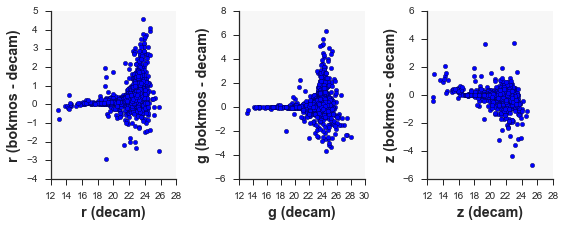

In [198]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    diff= m1['bokmos'].data[val]- m1['decam'].data[val]
    ax[cnt].scatter(m1['decam'].data[val], diff)
    xlab=ax[cnt].set_xlabel('%s (decam)' % val[0], **laba)
    ylab=ax[cnt].set_ylabel('%s (bokmos - decam)' % val[0], **laba)
# sup=plt.suptitle('decam with matching bokmos',**laba)
#save
sns.despine()
plt.savefig('color_diff.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


array([ 20.  ,  20.25,  20.5 ,  20.75,  21.  ,  21.25,  21.5 ,  21.75,
        22.  ,  22.25,  22.5 ,  22.75,  23.  ,  23.25,  23.5 ,  23.75,
        24.  ,  24.25,  24.5 ,  24.75,  25.  ,  25.25,  25.5 ,  25.75])

In [338]:
width=0.25 #in mag
low_vals= np.arange(20.,26.,width)
med={}
for b in ['g','r','z']: med[b]=np.zeros(low_vals.size)-100
for i,low in enumerate(low_vals):
    for band in ['g','r','z']:
        ind= np.all((low <= m1['decam'].data[band+'mag'],m1['decam'].data[band+'mag'] < low+width),axis=0)
        if np.where(ind)[0].size > 0:
            med[band][i]= np.percentile(m1['bokmos'].data[band+'mag'][ind] - m1['decam'].data[band+'mag'][ind],q=50)
        else: 
            med[band][i]= np.nan
# lower <= m1['decam'].data['gmag'] < lower+width

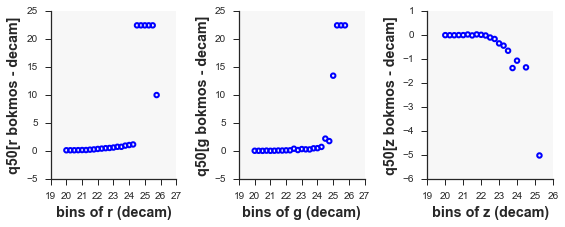

In [344]:
zoom=False
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
for cnt,band in zip(range(3),['r','g','z']):
#     print "low.size=",low.size,"med[band].size=",med[band].size
    ax[cnt].scatter(low_vals, med[band],\
                   edgecolor='b',c='none',lw=2.) #,label=m_type.split('_')[-1])
    xlab=ax[cnt].set_xlabel('bins of %s (decam)' % band, **laba)
    ylab=ax[cnt].set_ylabel('q50[%s bokmos - decam]' % band, **laba)
    if zoom: ax[cnt].set_ylim(-0.25,0.25)
# sup=plt.suptitle('decam with matching bokmos',**laba)
#save
sns.despine()
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

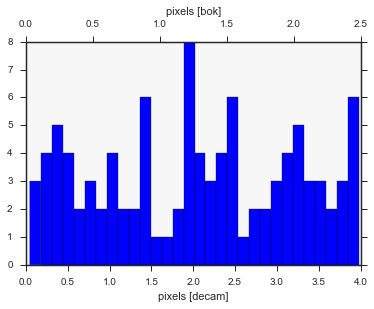

In [351]:
#second y-axis
# ax2 = ax[cnt].twinx()
# time_LHS,welch,ks,U= steady_state_test_rw_to_end(sink[str_beta],corr=True)
# ax2.plot(time_LHS,U['p'],c=c2)
# ylab= ax2.set_ylabel("U test p-value",color=c2,**laba)
pixscale=dict(decam=0.25,bokmos=0.45)
sep= np.random.rand(100) #arcsec

#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots() #,sharey=True)
plt.subplots_adjust(wspace=0.5)
ax.hist(sep/pixscale['decam'],bins=30,color='b',align='mid')
ax2 = ax.twiny()
ax2.hist(sep/pixscale['bokmos'],bins=30,color='g',align='mid',visible=False)
xlab= ax.set_xlabel("pixels [decam]")
xlab= ax2.set_xlabel("pixels [bok]")



In [355]:
plt.legend?

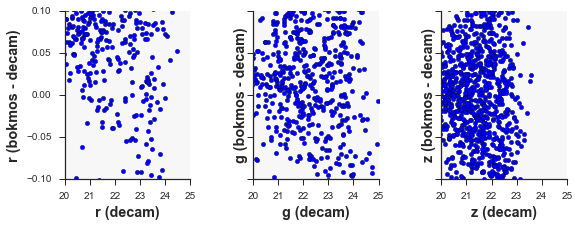

In [199]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3),sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    diff= m1['bokmos'].data[val]- m1['decam'].data[val]
    ax[cnt].scatter(m1['decam'].data[val], diff)
    ax[cnt].set_ylim(-0.1,0.1)
    ax[cnt].set_xlim(20,25)
    xlab=ax[cnt].set_xlabel('%s (decam)' % val[0], **laba)
    ylab=ax[cnt].set_ylabel('%s (bokmos - decam)' % val[0], **laba)
# plt.suptitle('decam with matching bokmos',**laba)
#save
sns.despine()
plt.savefig('color_diff_zm.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


In [361]:
a=m1['decam'].data['rmag']*np.sqrt(m1['decam'].data['rmag_ivar'])
set(m1['decam'].data['type'])

{'COMP', 'DEV', 'EXP', 'PSF', 'SIMP'}

# final plots for deep2f3 comparisons

In [357]:
# m1['decam'].data['type']
from sklearn.metrics import confusion_matrix

In [16]:
gmag=np.ma.array( np.arange(1,10), mask=np.arange(1,10) < 5)
rmag=np.ma.array( np.arange(5,14), mask=np.arange(5,14) > 8)
a= np.all((gmag < 5,rmag> 8),axis=0) )
print a,gmag,rmag


[False False False False False False False False False] [-- -- -- -- 5 6 7 8 9] [5 6 7 8 -- -- -- -- --]


In [23]:
cm=np.zeros((5,5))
cm.shape[0]

5

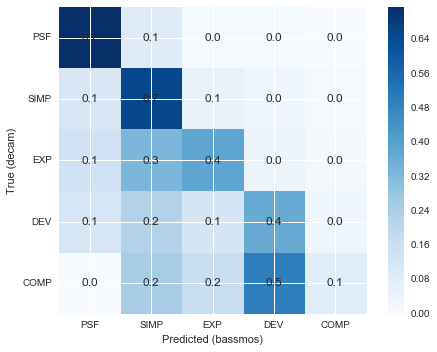

In [3]:
def plot_confusion_matrix(cm,ticknames=range(5),cmap=plt.cm.Blues,fname='conf_matrix.png'):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    cbar=plt.colorbar()
    plt.xticks(range(len(ticknames)), ticknames)
    plt.yticks(range(len(ticknames)), ticknames)
    ylab=plt.ylabel('True (decam)')
    xlab=plt.xlabel('Predicted (bassmos)')
    for row in range(len(ticknames)):
        for col in range(len(ticknames)):
            plt.text(col,row,'%.1f'%cm[row,col],va='center',ha='center')
    plt.savefig(fname, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
#     plt.close()

# my_conf_matrix
# grid= confusion_matrix(Yval,pred)
cm=np.zeros((5,5))-1
types=['PSF','SIMP','EXP','DEV','COMP']
for i_dec,dec_type in enumerate(types):
    ind= np.where(m1['decam'].data['type'] == dec_type)[0]
    for i_bass,bass_type in enumerate(types):
        n_bass= np.where(m1['bokmos'].data['type'][ind] == bass_type)[0].size
#         print bass_type,n_bass,n_dec,dec_type
        cm[i_dec,i_bass]= float(n_bass)/ind.size

plot_confusion_matrix(cm,ticknames=types,fname='confusion_matrix.png')

In [11]:
np.all(([True,False],[True,True]),axis=0)

array([ True, False], dtype=bool)

In [384]:
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
leg_args=dict(loc=1,frameon=True)
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= m1[camera].data[val]*np.sqrt(m1[camera].data[val+'_ivar'])
        ax[cnt].scatter(m1[camera].data[val], SN, c=color[ith],label=camera,edgecolors='none')
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args)
sup=plt.suptitle('All Models, Matched',**laba)
#save
sns.despine()
plt.savefig('sn_all_sources.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

array([ 392.70561137,   70.11180236,  224.67374892, ...,  611.96881309,
         12.95470673,  794.48756545])

In [270]:
def plot_SN(matched_obj,matched=True,index='all'):
    '''matched_obj -- m1 or unm, has keys 'decam' and 'bokmos'
    index -- "all, ptf, lrg" and just those indices will be plotted'''
    #set seaborn panel styles
    sns.set_style('ticks',{"axes.facecolor": ".97"})
    sns.set_palette('colorblind')
    #setup plot
    laba=dict(fontweight='bold',fontsize='x-large')
    kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
    fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
    plt.subplots_adjust(wspace=0.5)
    #plot
    color=['b','g']
    for cnt,val in zip(range(3),['rmag','gmag','zmag']):
        for ith,camera in zip(range(2),['decam','bokmos']):
            SN= matched_obj[camera].data[val]*np.sqrt(matched_obj[camera].data[val+'_ivar'])
            if index == 'all': inds= np.arange(len(matched_obj[camera].data[val].size))
            elif index == 'psf': inds= matched_obj[camera].data['type'] == 'PSF'
            elif index == 'lrg': inds= matched_obj[camera].data['i_lrg']
            else: raise ValueError
            ax[cnt].scatter(matched_obj[camera].data[val][inds], SN[ inds ], c=color[ith],label=camera)
        xlab=ax[cnt].set_xlabel(val, **laba)
        ax[cnt].set_xlim(20,30)
        ax[cnt].set_ylim(1e0,1e3)
        ax[cnt].set_yscale('log')
    ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
    ax[2].legend(**leg_args)
    if matched: sup= '%s, Matched' % index
    else: sup= '%s, Unatched' % index
    sup=plt.suptitle(sup,**laba)
    #save
    sns.despine()
    if matched: fout='sn_%s.png' % index
    else: fout='sn_%s_unmatched.png' % index
    plt.savefig(fout, bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight',dpi=150)
    plt.close()
    
plot_SN(unm,matched=False,index='psf')

In [283]:
plt.legend?

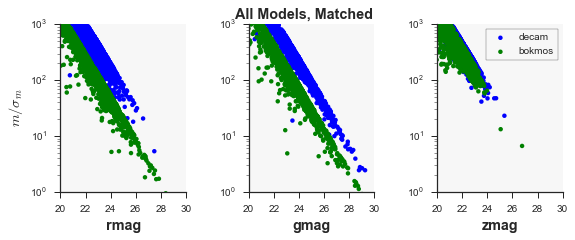

In [274]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
leg_args=dict(loc=1,frameon=True)
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= m1[camera].data[val]*np.sqrt(m1[camera].data[val+'_ivar'])
        ax[cnt].scatter(m1[camera].data[val], SN, c=color[ith],label=camera,edgecolors='none')
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args)
sup=plt.suptitle('All Models, Matched',**laba)
#save
sns.despine()
plt.savefig('sn_all_sources.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

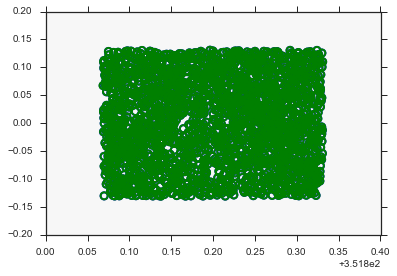

In [326]:
plt.scatter(m1['decam'].data['ra'],m1['decam'].data['dec'],s=50,\
           edgecolor='b',c='none',lw=2.,label='decam')
plt.scatter(m1['bokmos'].data['ra'],m1['bokmos'].data['dec'],s=50,\
           edgecolor='g',c='none',lw=2.,label='decam')

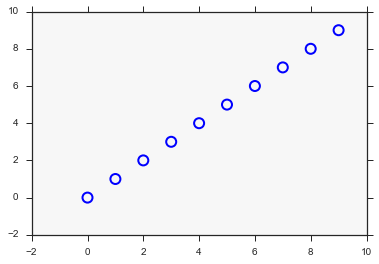

In [282]:
plt.scatter(range(10),range(10),s=100,edgecolor='b',c='none',lw=2.)


In [316]:
np.any(([True,False,False],[False,False,False]),axis=0)

array([ True, False, False], dtype=bool)

In [321]:
np.all(np.array([False,False,False]) == np.array([True,False,False]))

False

False

In [308]:
a=np.arange(10).astype(float)
a[4:7]=np.nan
b=np.ma.array(a,mask=np.isnan(a))
c=b.copy()
a=b.copy()

In [314]:
b.mask == c.mask and a.mask==c.mask

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [301]:
np.any(([True,False,False],[False,False,True]),axis=0)

array([ True, False,  True], dtype=bool)

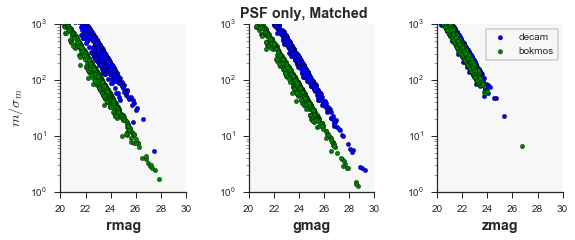

In [190]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= m1[camera].data[val]*np.sqrt(m1[camera].data[val+'_ivar'])
        i_psf= m1[camera].data['type'] == 'PSF'
        ax[cnt].scatter(m1[camera].data[val][i_psf], SN[ i_psf ], c=color[ith],label=camera)
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args)
sup=plt.suptitle('PSF only, Matched',**laba)
#save
sns.despine()
plt.savefig('sn_psf.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

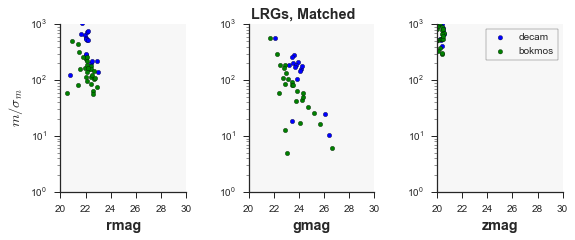

In [191]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= m1[camera].data[val]*np.sqrt(m1[camera].data[val+'_ivar'])
        i_lrg= m1[camera].data['i_lrg']
        ax[cnt].scatter(m1[camera].data[val][i_lrg], SN[ i_lrg ], c=color[ith],label=camera)
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args)
sup=plt.suptitle('LRGs, Matched',**laba)
#save
sns.despine()
plt.savefig('sn_lrg.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

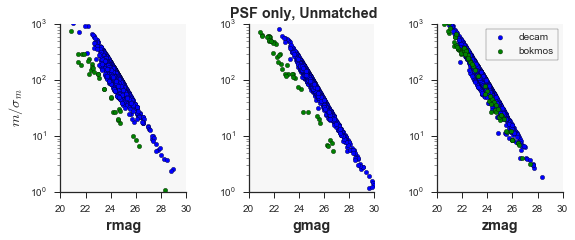

In [193]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= unm[camera].data[val]*np.sqrt(unm[camera].data[val+'_ivar'])
        i_psf= unm[camera].data['type'] == 'PSF'
        ax[cnt].scatter(unm[camera].data[val][i_psf], SN[ i_psf ], c=color[ith],label=camera)
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args)
sup=plt.suptitle('PSF only, Unmatched',**laba)
#save
sns.despine()
plt.savefig('sn_unmatched_psf.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

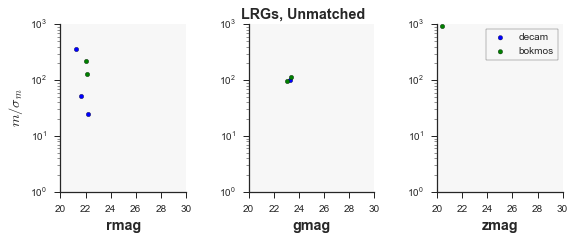

In [194]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='x-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
leg_args=dict(loc=1,frameon=True)
fig,ax=plt.subplots(1,3,figsize=(9,3)) #,sharey=True)
plt.subplots_adjust(wspace=0.5)
#plot
color=['b','g']
for cnt,val in zip(range(3),['rmag','gmag','zmag']):
    for ith,camera in zip(range(2),['decam','bokmos']):
        SN= unm[camera].data[val]*np.sqrt(unm[camera].data[val+'_ivar'])
        i_lrg= unm[camera].data['i_lrg']
        ax[cnt].scatter(unm[camera].data[val][i_lrg], SN[ i_lrg ], c=color[ith],label=camera)
    xlab=ax[cnt].set_xlabel(val, **laba)
    ax[cnt].set_xlim(20,30)
    ax[cnt].set_ylim(1e0,1e3)
    ax[cnt].set_yscale('log')
ylab=ax[0].set_ylabel(r'$m / \sigma_m$', **laba)
ax[2].legend(**leg_args) 
sup=plt.suptitle('LRGs, Unmatched',**laba)
#save
sns.despine()
plt.savefig('sn_unmatched_lrg.png', bbox_extra_artists=[xlab,ylab,sup], bbox_inches='tight')

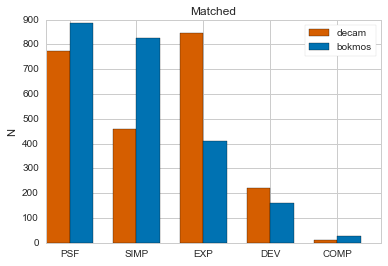

In [181]:
sns.set_style("whitegrid")
sns.set_palette('colorblind')
c1=sns.color_palette()[2] 
c2=sns.color_palette()[0] #'b'
###
types= ['PSF','SIMP','EXP','DEV','COMP']
ind = np.arange(len(types))  # the x locations for the groups
width = 0.35       # the width of the bars
###
ht_decam, ht_bokmos= np.zeros(5,dtype=int),np.zeros(5,dtype=int)
for cnt,typ in enumerate(types):
    ht_decam[cnt]= np.where(m1['decam'].data['type'] == typ)[0].shape[0]
    ht_bokmos[cnt]= np.where(m1['bokmos'].data['type'] == typ)[0].shape[0]
###
fig, ax = plt.subplots()
rects1 = ax.bar(ind, ht_decam, width, color=c1)
rects2 = ax.bar(ind + width, ht_bokmos, width, color=c2)
ax.set_ylabel("N")
ax.set_title('Matched')
ax.set_xticks(ind + width)
ax.set_xticklabels(types)
ax.legend((rects1[0], rects2[0]), ('decam', 'bokmos'),**leg_args)
#save
plt.savefig('hist_types_matched.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')


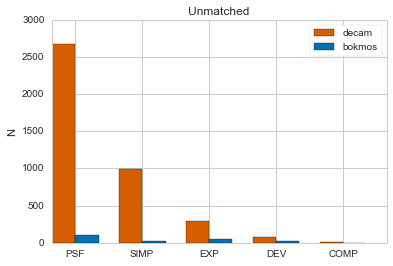

In [182]:
sns.set_style("whitegrid")
sns.set_palette('colorblind')
c1=sns.color_palette()[2] 
c2=sns.color_palette()[0] #'b'
###
types= ['PSF','SIMP','EXP','DEV','COMP']
ind = np.arange(len(types))  # the x locations for the groups
width = 0.35       # the width of the bars
###
ht_decam, ht_bokmos= np.zeros(5,dtype=int),np.zeros(5,dtype=int)
for cnt,typ in enumerate(types):
    ht_decam[cnt]= np.where(unm['decam'].data['type'] == typ)[0].shape[0]
    ht_bokmos[cnt]= np.where(unm['bokmos'].data['type'] == typ)[0].shape[0]
###
fig, ax = plt.subplots()
rects1 = ax.bar(ind, ht_decam, width, color=c1)
rects2 = ax.bar(ind + width, ht_bokmos, width, color=c2)
ax.set_ylabel("N")
ax.set_title('Unmatched')
ax.set_xticks(ind + width)
ax.set_xticklabels(types)
ax.legend((rects1[0], rects2[0]), ('decam', 'bokmos'),**leg_args)
#save
plt.savefig('hist_types_unmatched.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [127]:
a=np.arange(-5,10)
b=np.log10(a)
print np.isnan(b)
print np.isinf(b)
m=np.ma.masked_array(b, mask=np.any((np.isnan(b),np.isinf(b)),axis=0))
print m.mask
k=np.sqrt(m)
k.mask

[ True  True  True  True  True False False False False False False False
 False False False]
[False False False False False  True False False False False False False
 False False False]
[ True  True  True  True  True  True False False False False False False
 False False False]


array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False], dtype=bool)

In [111]:
i_lrg= range(len(m1['decam'].data[band+'mag'])/2)
for band in ['g','r','z']:
    a=m1['decam'].data[band+'mag'][i_lrg]
    # np.where(a == np.nan)
    # plt.hist(a,range=(10,))
    ind=[]
    for i in range(len(a)): 
        if np.isnan(a[i]): ind.append(i)
    print 'band=%s, %d nans' % (band,len(ind))

band=g, 28 nans
band=r, 1 nans
band=z, 0 nans


(array([   5.,    9.,   26.,   53.,  123.,  299.,  627.,  979.,  185.,    4.]),
 array([ 12.72036266,  13.98417006,  15.24797745,  16.51178484,
         17.77559223,  19.03939962,  20.30320702,  21.56701441,
         22.8308218 ,  24.09462919,  25.35843658]),
 <a list of 10 Patch objects>)

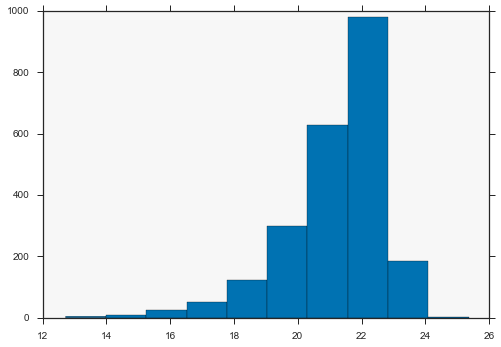

In [115]:
plt.hist(gs)

In [64]:
float(len(np.where(m1['decam'].data['i_lrg'])[0]))/len(m1['decam'].data['type'])

0.012537829658452227

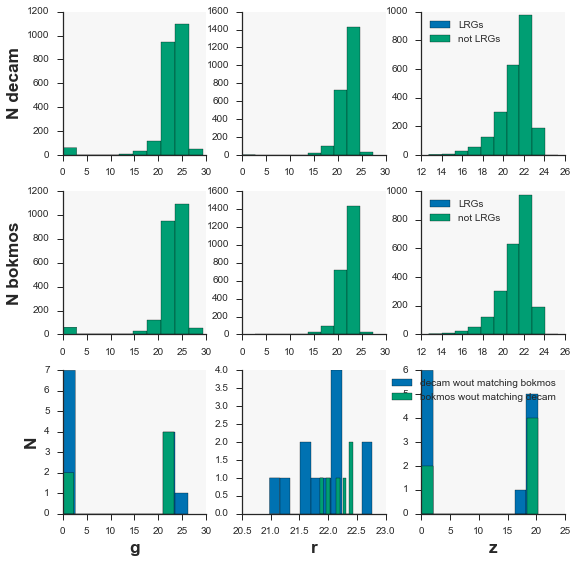

In [65]:
#set seaborn panel styles
sns.set_style('ticks',{"axes.facecolor": ".97"})
sns.set_palette('colorblind')
#setup plot
laba=dict(fontweight='bold',fontsize='xx-large')
kwargs_axtext=dict(fontweight='bold',fontsize='x-large',va='top',ha='left')
fig,ax=plt.subplots(3,3,figsize=(9,9))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
#plot
for row in range(3):
    for col,band in zip(range(3),['g','r','z']):
        if row == 0: 
            cam='decam'
            i_lrg= m1[cam].data['i_lrg']
            ax[row,col].hist(m1[cam].data[band+'mag'][i_lrg],label='LRGs')
            i_other= list(set(range(m1[dat].data[band+'mag'].shape[0])) - set(i_lrg))
            ax[row,col].hist(m1[dat].data[band+'mag'][i_other],label='not LRGs')
        if row == 1: 
            cam='bokmos'
            i_lrg= m1[cam].data['i_lrg']
            ax[row,col].hist(m1[dat].data[band+'mag'][i_lrg],label='LRGs')
            i_other= list(set(range(m1[dat].data[band+'mag'].shape[0])) - set(i_lrg))
            ax[row,col].hist(m1[dat].data[band+'mag'][i_other],label='not LRGs')
        if row == 2: 
            cam='decam'
            i_lrg= unm[cam].data['i_lrg']
            ax[row,col].hist(unm[cam].data[band+'mag'][i_lrg],label='decam wout matching bokmos')
            cam='bokmos'
            i_lrg= unm[cam].data['i_lrg']
            ax[row,col].hist(unm['bokmos'].data[band+'mag'][i_lrg],label='bokmos wout matching decam')
for i,band,ylabel in zip(range(3),['g','r','z'],['N decam','N bokmos','N']): 
    xlab=ax[2,i].set_xlabel(band,**laba)
    ylab=ax[i,0].set_ylabel(ylabel,**laba)
    ax[i,2].legend(loc=0)
#save
sns.despine()
plt.savefig('test.png', bbox_extra_artists=[xlab,ylab], bbox_inches='tight')

In [68]:
a=np.nan
np.isnan(a)

True

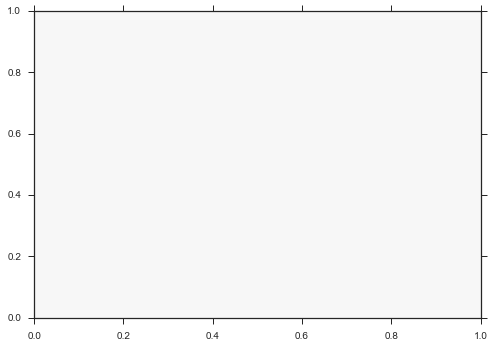

In [61]:
fig,ax=plt.subplots()
ax.tick_params
plt.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom='off',      # ticks along the bottom edge are off
top='off',         # ticks along the top edge are off
labelbottom='off') 

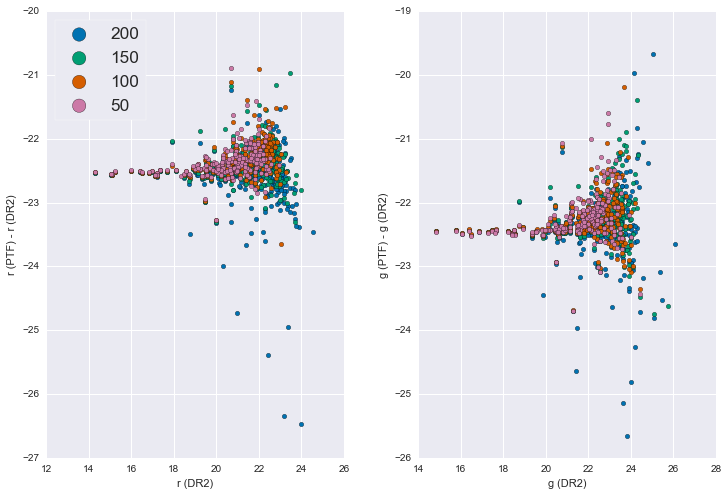

In [99]:
reload(plots)
colors= plots.get_seaborn_colors()
#plot
fig,axes=plt.subplots(1,2,figsize=(12,8))
ax=axes.flatten()
plt.subplots_adjust(hspace=0.1,wspace=0.25)
#add pts
for cnt,key in enumerate(['p200','p150','p100','p50']):
    diff= a[key]['PTF'].data['rmag']- a[key]['DR2'].data['rmag']
    ax[0].scatter(a[key]['DR2'].data['rmag'], diff,c=colors[cnt],label=key[1:])
    diff= a[key]['PTF'].data['gmag']- a[key]['DR2'].data['gmag']
    ax[1].scatter(a[key]['DR2'].data['gmag'], diff,c=colors[cnt])
#
ax[0].legend(loc=2,fontsize='xx-large',markerscale=3,frameon=True)
for cnt,band in enumerate(['r','g']):
    ax[cnt].set_ylabel('%s (PTF) - %s (DR2)' % (band,band))
    ax[cnt].set_xlabel('%s (DR2)' %(band,))
plt.savefig('./dr2_v_ptf.png',dpi=200)




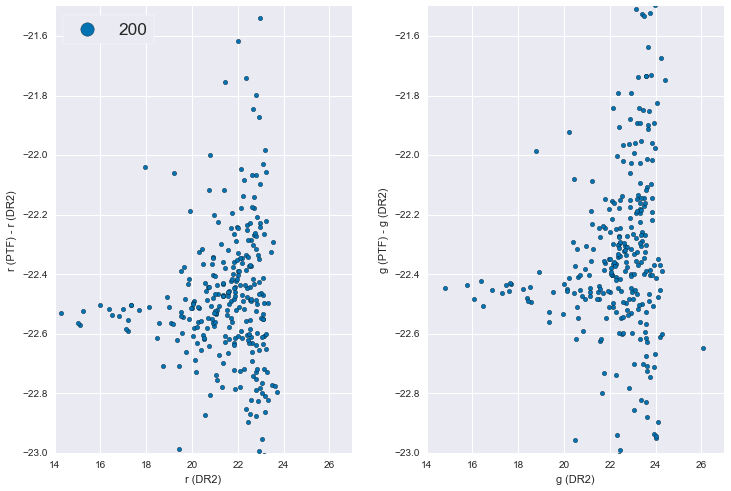

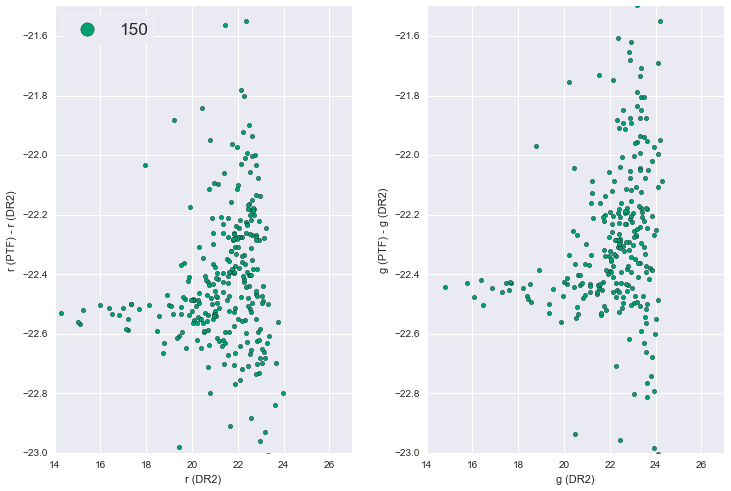

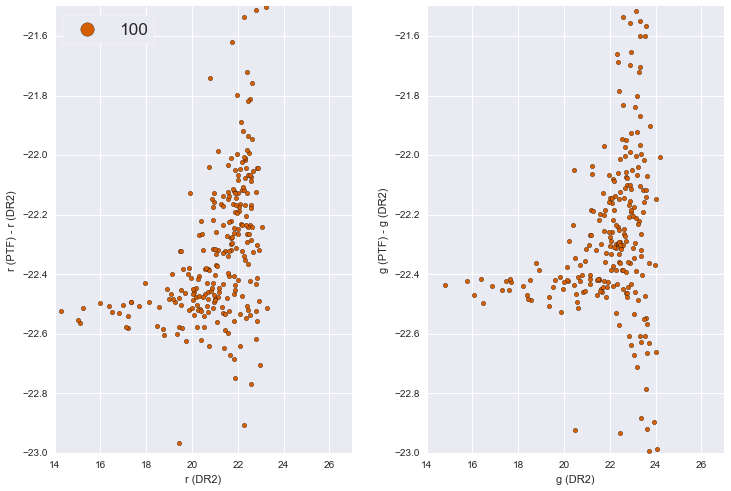

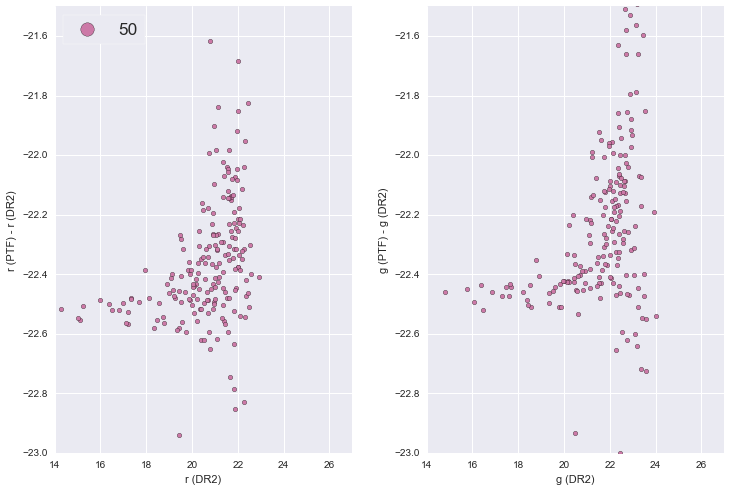

In [102]:
reload(plots)
colors= plots.get_seaborn_colors()
#plot
for cnt,key in enumerate(['p200','p150','p100','p50']):
    fig,axes=plt.subplots(1,2,figsize=(12,8))
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.25)
    #add pts
    diff= a[key]['PTF'].data['rmag']- a[key]['DR2'].data['rmag']
    ax[0].scatter(a[key]['DR2'].data['rmag'], diff,c=colors[cnt],label=key[1:])
    diff= a[key]['PTF'].data['gmag']- a[key]['DR2'].data['gmag']
    ax[1].scatter(a[key]['DR2'].data['gmag'], diff,c=colors[cnt])
    #
    ax[0].legend(loc=2,fontsize='xx-large',markerscale=3,frameon=True)
    for cnt,band in enumerate(['r','g']):
        ax[cnt].set_ylabel('%s (PTF) - %s (DR2)' % (band,band))
        ax[cnt].set_xlabel('%s (DR2)' %(band,))
        ax[cnt].set_xlim(14,27)
        ax[cnt].set_ylim(-23,-21.5)
    plt.savefig('./dr2_v_ptf_%s_zoom.png' % key[1:],dpi=200)

In [41]:
np.where(ptf['rflux'] < 0)

(array([], dtype=int64),)

# PTF 50-200 comparisons 

In [6]:
d={}
d50= tractor_cat('../tractor_cat_ptf/25g25R/tractor-custom-150385p02200.fits')
d100= tractor_cat('../tractor_cat_ptf/50g50R/tractor-custom-150385p02200.fits')
d150= tractor_cat('../tractor_cat_ptf/75g75R/tractor-custom-150385p02200.fits')
d200= tractor_cat('../tractor_cat_ptf/100g100R/tractor-custom-150385p02200.fits')
print d50.keys()
g,r= 1,2

['bx', 'shapeexp_r_ivar', 'tycho2inblob', 'decam_psfsize', 'ebv', 'shapeexp_e1_ivar', 'decam_apflux_ivar', 'shapeexp_r', 'decam_flux_ivar', 'shapeexp_e2_ivar', 'decam_fracflux', 'bx0', 'fracdev', 'out_of_bounds', 'decam_allmask', 'brick_primary', 'decam_apflux', 'ninblob', 'shapeexp_e1', 'type', 'decam_flux', 'decam_rchi2', 'blob', 'brickname', 'decam_apflux_resid', 'shapeexp_e2', 'shapedev_e2', 'shapedev_e1', 'decam_fracin', 'ra', 'left_blob', 'decam_nobs', 'objid', 'shapedev_r_ivar', 'decam_anymask', 'by', 'brickid', 'shapedev_e1_ivar', 'shapedev_r', 'fracdev_ivar', 'ra_ivar', 'by0', 'dchisq', 'decam_mw_transmission', 'dec', 'shapedev_e2_ivar', 'decam_fracmasked', 'dec_ivar']


In [7]:
def ptf_mag(data):
    g,r= 1,2
    ind= np.all((data['decam_flux'][:,g] > 0,data['decam_flux'][:,r] > 0),axis=0)
    data['gmag']= -2.5*np.log10(data['decam_flux'][:,g][ind])
    data['rmag']= -2.5*np.log10(data['decam_flux'][:,r][ind])

In [8]:
# data['decam_flux'][0,g]
ptf_mag(d50)
ptf_mag(d100)
ptf_mag(d150)
ptf_mag(d200)

In [54]:
set(d200['type'])

{'COMP', 'DEV ', 'EXP ', 'PSF ', 'SIMP'}

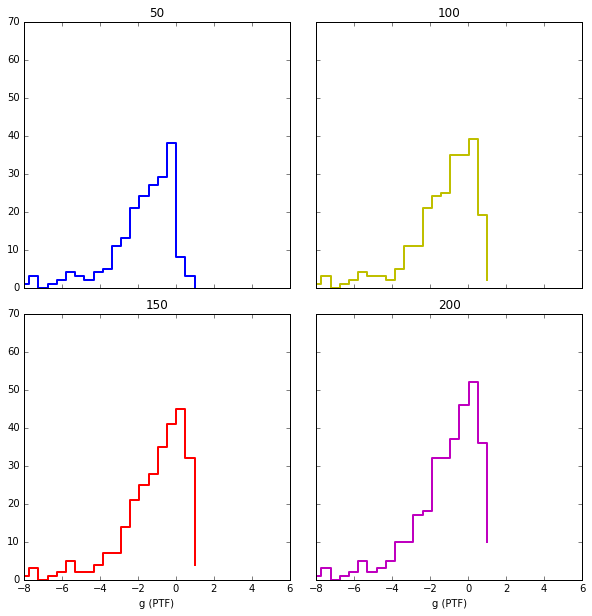

In [11]:
#N per band
for band in ['g','r']:
    h={}
    key='%smag' % band
    h['d200']= plt.hist(d200[key],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
    plt.savefig('./n_%sband.png' % band)
#     plt.close()

In [14]:
#N per TYPE
for typ in list(set(d50['type'])):
    h={}
    key='%smag' % typ
    h['d200']= plt.hist(d200[],bins=20,edgecolor='y',facecolor='none',lw=2)
    bins=h['d200'][1]
    h['d50']= plt.hist(d50[key],bins=bins,edgecolor='b',facecolor='none',lw=2)
    h['d100']= plt.hist(d100[key],bins=bins,edgecolor='c',facecolor='none',lw=2)
    h['d150']= plt.hist(d150[key],bins=bins,edgecolor='m',facecolor='none',lw=2)
    plt.close()
    fig,axes=plt.subplots(2,2,figsize=(10,10),sharex=True,sharey=True)
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    for cnt,key,c in zip(range(4),['d50','d100','d150','d200'],['b','y','r','m']): 
        ax[cnt].step(h[key][1][:-1],h[key][0],where='post',lw=2,c=c)
        ax[cnt].set_title(key[1:])
        ax[cnt].set_xlim(-8,6)
        ax[cnt].set_ylim(0,70)
        if cnt >= 2: ax[cnt].set_xlabel('g (PTF)')
#     plt.savefig('./n_%sband.png' % band)
#     plt.close()

KeyError: 'PSF mag'

In [65]:
d200['type']

array(['PSF ', 'EXP ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ', 'PSF ',
       'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'EXP ', 'SIMP', 'PSF ', 'DEV ', 'PSF ', 'PSF ', 'PSF ', 'SIMP',
       'DEV ', 'PSF ', 'DEV ', 'DEV ', 'SIMP', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'COMP', 'PSF ', 'SIMP', 'PSF ', 'EXP ', 'PSF ', 'SIMP',
       'PSF ', 'PSF ', 'PSF ', 'PSF ', 'EXP ', 'EXP ', 'EXP ', 'PSF ',
       'SIMP', 'EXP ', 'PSF ', 'SIMP', 'SIMP', 'DEV ', 'SIMP', 'EXP ',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'PSF ', 'PSF ', 'PSF ', 'SIMP', 'PSF ',
       'SIMP', 'SIMP', 'SIMP', 'SIMP', 'PSF ', 'SIMP', 'SIMP', 'SIMP',
       'SIMP', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP', 'SIMP', 'PSF ',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'PSF ', 'PSF ',
       'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP', 'SIMP',
       'SIMP', 'PSF ', 'SIMP', 'PSF ', 'SIMP', 'PSF ', 'PSF ', 'SIMP',
      

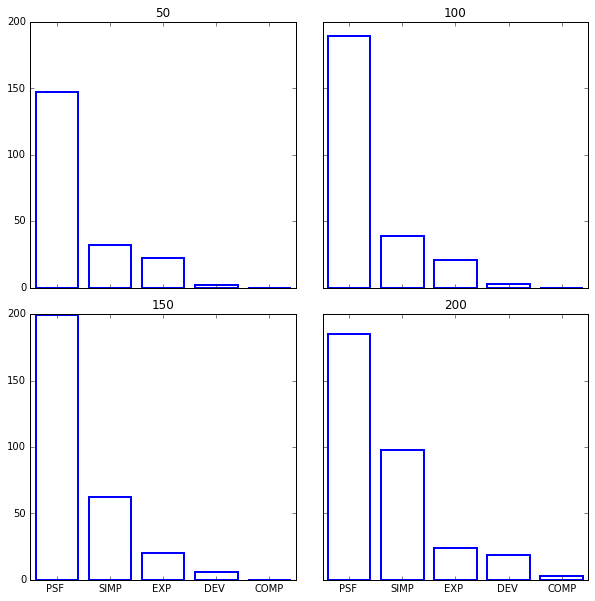

In [13]:
testNames= ['PSF ','SIMP','EXP ','DEV ','COMP'] #list(set(d200['type']))
pos = np.arange(len(testNames)) + 0.5
fig,axes=plt.subplots(2,2,figsize=(10,10)) #,sharex=True,sharey=True)
ax=axes.flatten()
plt.subplots_adjust(hspace=0.1,wspace=0.1)
ax[0].bar(pos, [(d50['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[1].bar(pos, [(d100['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=[""]*5,lw=2,\
                        edgecolor='b',facecolor='none')
ax[2].bar(pos, [(d150['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
ax[3].bar(pos, [(d200['type'] == typ).sum() for typ in testNames],
                     align='center',color='b',tick_label=testNames,lw=2,\
                        edgecolor='b',facecolor='none')
for i in [1,3]: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
for i in range(4): ax[i].set_ylim(0,200)
for cnt,title in enumerate(['50','100','150','200']): ax[cnt].set_title(title)
# plt.savefig('./n_type.png')
# plt.close()


In [61]:
(d50['type'] == 'PSF ').sum()

(203,)

In [4]:
a=fits.open("../ptf_test/tractor-custom-150385p02200.fits")

In [9]:
a[1].data

FITS_rec([ (-1, 'custom-150385p02200', 0, True, 0, 2, False, 'PSF', 150.42635821352121, 5.2504871e+10, 2.1302973385463391, 4.8712163e+10, 102.18633, 1.0567238, 104.0, 1.0, False, False, array([ 8232.30664062,  8163.39648438,  8230.39550781,  8230.38378906,
           0.        ], dtype=float32), 0.017356807, array([  0.        ,   7.47725439,  15.95682716,   0.        ,
         0.        ,   0.        ], dtype=float32), array([  0.        ,  55.29242706,  20.19062424,   0.        ,
         0.        ,   0.        ], dtype=float32), array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.72893155,   1.46605825,   2.29628515,   4.33576059,
          5.71594334,   7.02689552,   7.09407187,   6.99522686],
       [  1.39439499,   2.83541203,   4.43656683,   8.37290287,
         11.19778919,  14.41354656,  15.03293228,  14.81234646],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         

In [6]:
hd,data=tractor_cat('../ptf_test/tractor-custom-150385p02200.fits')

NameError: global name 'tbdata' is not defined

/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/Users/kburleigh/miniconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in divide


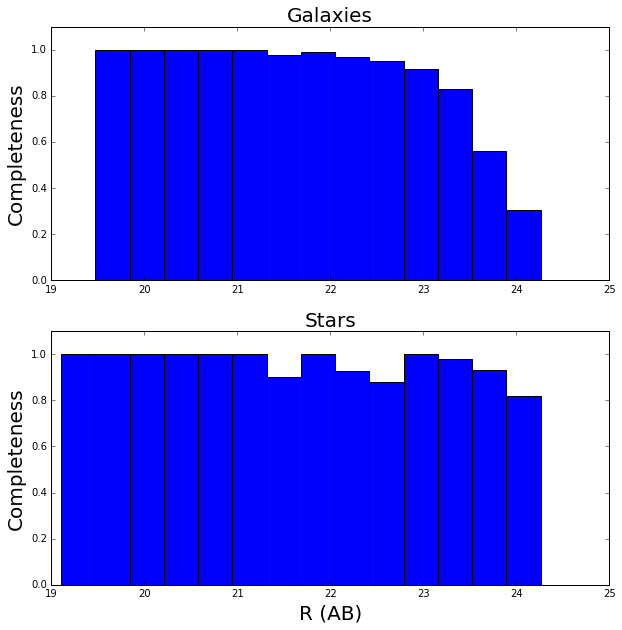

In [12]:
#same magnitude bins for detections
lo=int(min(m_gal['bestr'].min(),un_gal['bestr'].min(),m_star['bestr'].min(),un_star['bestr'].min()))-1
hi=int(max(m_gal['bestr'].max(),un_gal['bestr'].max(),m_star['bestr'].max(),un_star['bestr'].max()))+1
bins=np.linspace(lo,hi,20)
h={}
h['m_gal']= plt.hist(m_gal['bestr'],bins=bins)
h['un_gal']= plt.hist(un_gal['bestr'],bins=bins)
h['m_star']= plt.hist(m_star['bestr'],bins=bins)
h['un_star']= plt.hist(un_star['bestr'],bins=bins)
plt.close()
#plot normalizing by total counts
fig,ax=plt.subplots(2,1,figsize=(10,10))
plt.subplots_adjust(wspace=0.5,hspace=0.2)
kwargs=dict(bar=dict(color='b'), text=dict(fontsize=20)) #,edgecolor='b',linewidth=2.,fill=False)
mpl.rcParams['xtick.labelsize'] = kwargs['text']['fontsize']-10
mpl.rcParams['ytick.labelsize'] = kwargs['text']['fontsize']-10
#panel 1
width= h['m_gal'][1][1:]-h['m_gal'][1][:-1]
ax[0].bar(h['m_gal'][1][:-1],h['m_gal'][0]/(h['m_gal'][0]+h['un_gal'][0]),width=width,**kwargs['bar'])
ax[0].set_ylabel("Completeness",**kwargs['text'])
ax[0].set_title("Galaxies",**kwargs['text'])
#panel 2
ax[1].bar(h['m_star'][1][:-1],h['m_star'][0]/(h['m_star'][0]+h['un_star'][0]),width=width,**kwargs['bar'])
ax[1].set_ylabel("Completeness",**kwargs['text'])
ax[1].set_title("Stars",**kwargs['text'])
ax[1].set_xlabel("R (AB)",**kwargs['text'])
for i in range(2):
    ax[i].set_ylim(0,1.1)
plt.savefig("completeness.png")

In [59]:
def row_col_plot(nrow,ncol,x,y,scatter=False,indices=None,fname='test.png',titles=None,xlim=False,ylim=False,logx=False,logy=False):
    '''x,y have shape (nrow*ncol,values,extra_axis)
    extra_axis is not necessary if plotting single line per plot otherwise extra axis 
    contains those lines'''
    assert(nrow == 1 or ncol == 1)
    assert(x.shape[0] == nrow*ncol)
    w,h=20,10
    fig,axes=plt.subplots(nrow,ncol,figsize=(w,h))
    ax=axes.flatten()
    plt.subplots_adjust(hspace=0,wspace=0)
    cnt=0
    for i in range(len(ax)):
        if len(x.shape) == 3: #exta_axis, multiple lines per plot
            for extra in range(x.shape[2]):
                #some values may be nan or inf if some lines longer than others
                iuse= np.isfinite(x[cnt,:,extra])
                if scatter: ax[i].scatter(x[cnt,iuse,extra],y[cnt,iuse,extra])
                else: ax[i].plot(x[cnt,iuse,extra],y[cnt,iuse,extra])
        else: 
            if scatter: ax[i].scatter(x[cnt,:],y[cnt,:])
            else: ax[i].plot(x[cnt,:],y[cnt,:])
        if titles is not None: ax[i].set_title('%s' % titles[cnt])
        cnt+=1
    for i in range(len(ax)):
        if xlim: ax[i].set_xlim(xlim[0],xlim[1])
        if ylim: ax[i].set_ylim(ylim[0],ylim[1])
        if logx: ax[i].set_xscale('log')
        if logy: ax[i].set_yscale('log')
#     for i in range(len(ax)):
#         if r != range(nrow)[-1]: ax[i].xaxis.set_major_formatter(plt.NullFormatter())
#         if c != 0: ax[i].yaxis.set_major_formatter(plt.NullFormatter())
#     plt.savefig(fname)
#     plt.close()

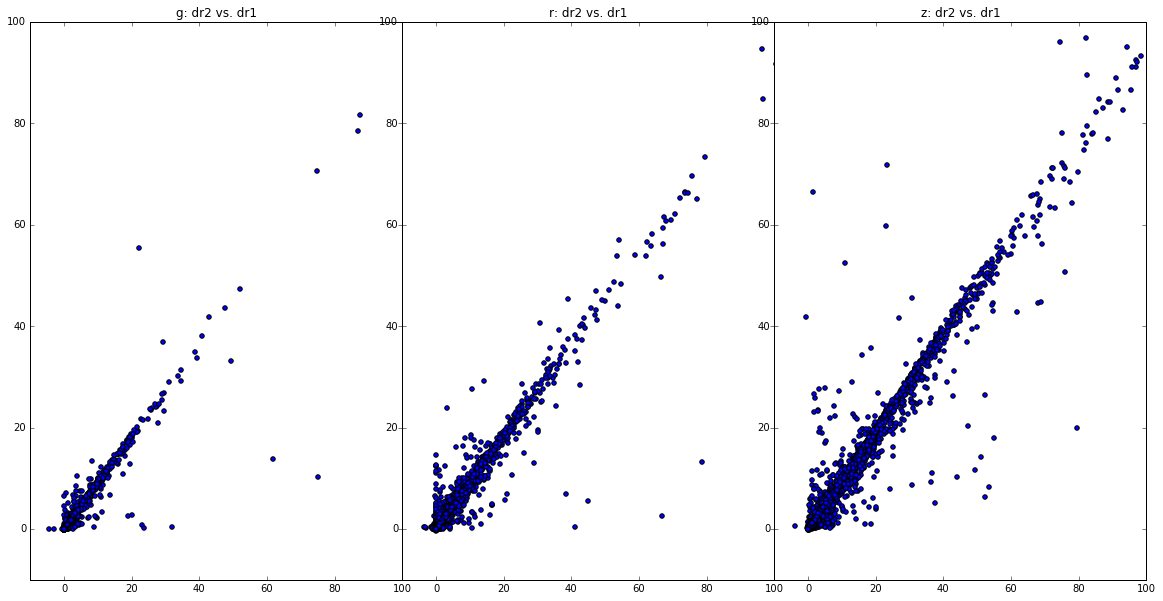

In [62]:
x=np.zeros( (3,len(data['dr1_gflux']),2) )
y=x.copy()
for i,dr1,dr2 in zip(range(3),
                     ['dr1_gflux', 'dr1_rflux', 'dr1_zflux'],
                    ['dr2_gflux', 'dr2_rflux', 'dr2_zflux']):
    x[i,:,0]= data[dr1]
#     x[i,:,1]= data[dr1] #drawing straight line
    y[i,:,0]= data[dr2]
#     y[i,:,1]= x[i,:,1]
titles=['%s: dr2 vs. dr1' % b for b in ['g','r','z']]
row_col_plot(1,3,x,y,titles=titles,scatter=True,ylim=[-10,100],xlim=[-10,100])

In [86]:
bashCommand = "date"
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output = process.communicate()[0]
output

'Wed Feb 17 15:42:33 PST 2016\n'

In [5]:
subprocess.Popen(['echo','hello'])